# FAKE NEWS DETECTION PROJECT

### Loading the dataset 

In [1]:
import pandas as pd

df = pd.read_csv("fake_news_kaggle/train.csv")
df.dropna(inplace = True)

In [2]:
print("Shape of News data:", df.shape)
print("News data columns", df.columns)

Shape of News data: (18285, 5)
News data columns Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


In [3]:
display(df)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


0    10361
1     7924
Name: label, dtype: int64


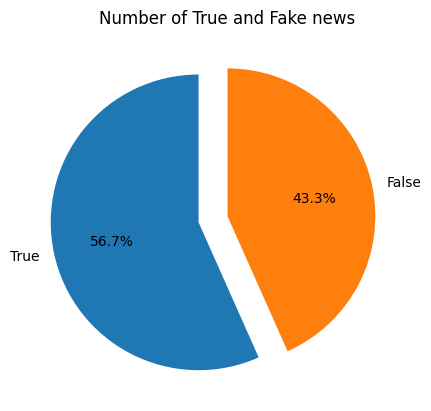

In [4]:
import matplotlib.pyplot as plt

print(df.label.value_counts())
plt.title("Number of True and Fake news")
plt.pie(df.label.value_counts(),labels=["True","False"],autopct='%1.1f%%',explode =[0.2,0], startangle=90)
plt.show()

In [5]:
df.text=df.title+" "+df.author+" "+df.text

In [6]:
df=df.drop(['id','title','author'],axis=1)

In [7]:
text_length = df.text.str.split().str.len()
text_length.describe()

count    18285.000000
mean       818.056440
std        886.831104
min          4.000000
25%        318.000000
50%        625.000000
75%       1110.000000
max      24245.000000
Name: text, dtype: float64

In [8]:
percentile25 = text_length.quantile(.1)
percentile75 = text_length.quantile(.99)

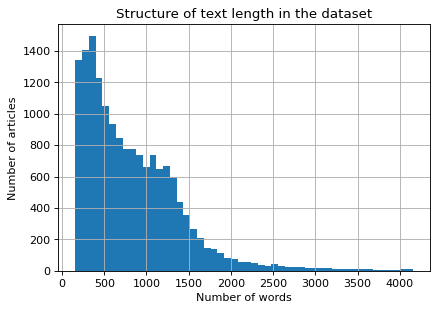

In [9]:
from matplotlib.pyplot import figure
figure(figsize=(6, 4), dpi=80)
plt.hist(text_length,bins=50,range=(percentile25, percentile75))
plt.ylabel('Number of articles')
plt.xlabel('Number of words')
plt.title('Structure of text length in the dataset')
plt.grid(True)
plt.show()

## Cleaning data

### Remove all besides text (mainly punctuaction)

In [10]:
df.text = df.text.str.replace('[^\w\s]','',regex=True)

### Lowering the text

In [11]:
df.text = df.text.str.lower()

### Tokenization

In [12]:
df['text']=df.apply(lambda row: row['text'].split(),axis=1)

### Stopwords removal

In [13]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
stopwords = [word.replace('\'','') for word in stopwords]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', '

In [14]:
df['text']=df.apply(lambda row: [word for word in row['text'] if not word in stopwords],axis=1)

### Stemming

In [15]:
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()
df['text']=df.apply(lambda row: [porter_stemmer.stem(word) for word in row['text']],axis=1)

## Data exploration

In [16]:
true_df=df[df["label"]==0]
true_df = true_df.drop('label', axis=1)
false_df=df[df["label"]==1]
false_df = false_df.drop('label', axis=1)

### Wordcount barplot true/false

In [17]:
true_counter = true_df.explode('text').value_counts()
false_counter = false_df.explode('text').value_counts()

In [18]:
true_counter = true_counter.to_frame().reset_index()
true_counter = true_counter.rename(columns={'text':'word', 0:'count'})
false_counter = false_counter.to_frame().reset_index()
false_counter = false_counter.rename(columns={'text':'word', 0:'count'})

In [19]:
print(true_counter.columns)

Index(['word', 'count'], dtype='object')


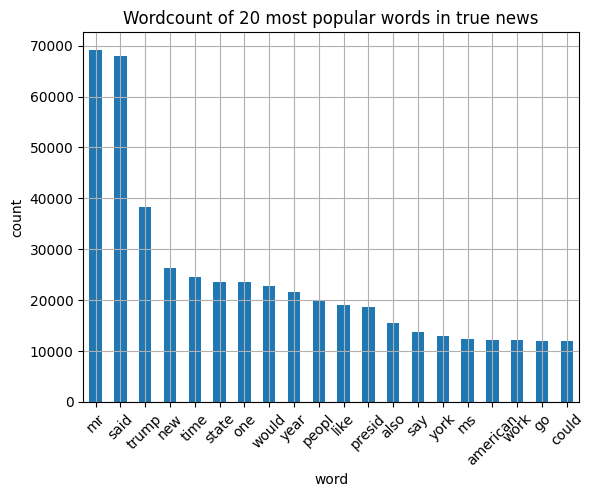

In [20]:
ax = true_counter.iloc[0:20].plot.bar(x='word',y='count', rot=45, grid=True, legend =False,
                                      title="Wordcount of 20 most popular words in true news")
ax.set_ylabel("count")
ax.text=False

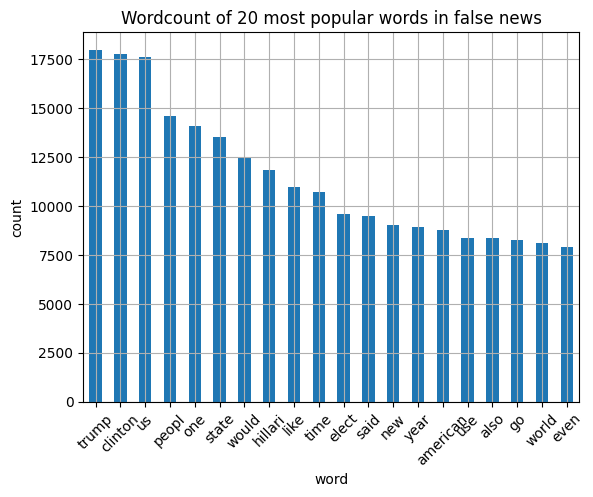

In [21]:
ax = false_counter.iloc[0:20].plot.bar(x='word',y='count', rot=45, grid=True, legend =False,
                                      title="Wordcount of 20 most popular words in false news")
ax.set_ylabel("count")
ax.text=False

### Wordcloud true/false

In [22]:
true_df = true_df.explode('text').reset_index()
true_text = " ".join(true_df.text)
false_df = false_df.explode('text').reset_index()
false_text = " ".join(false_df.text)

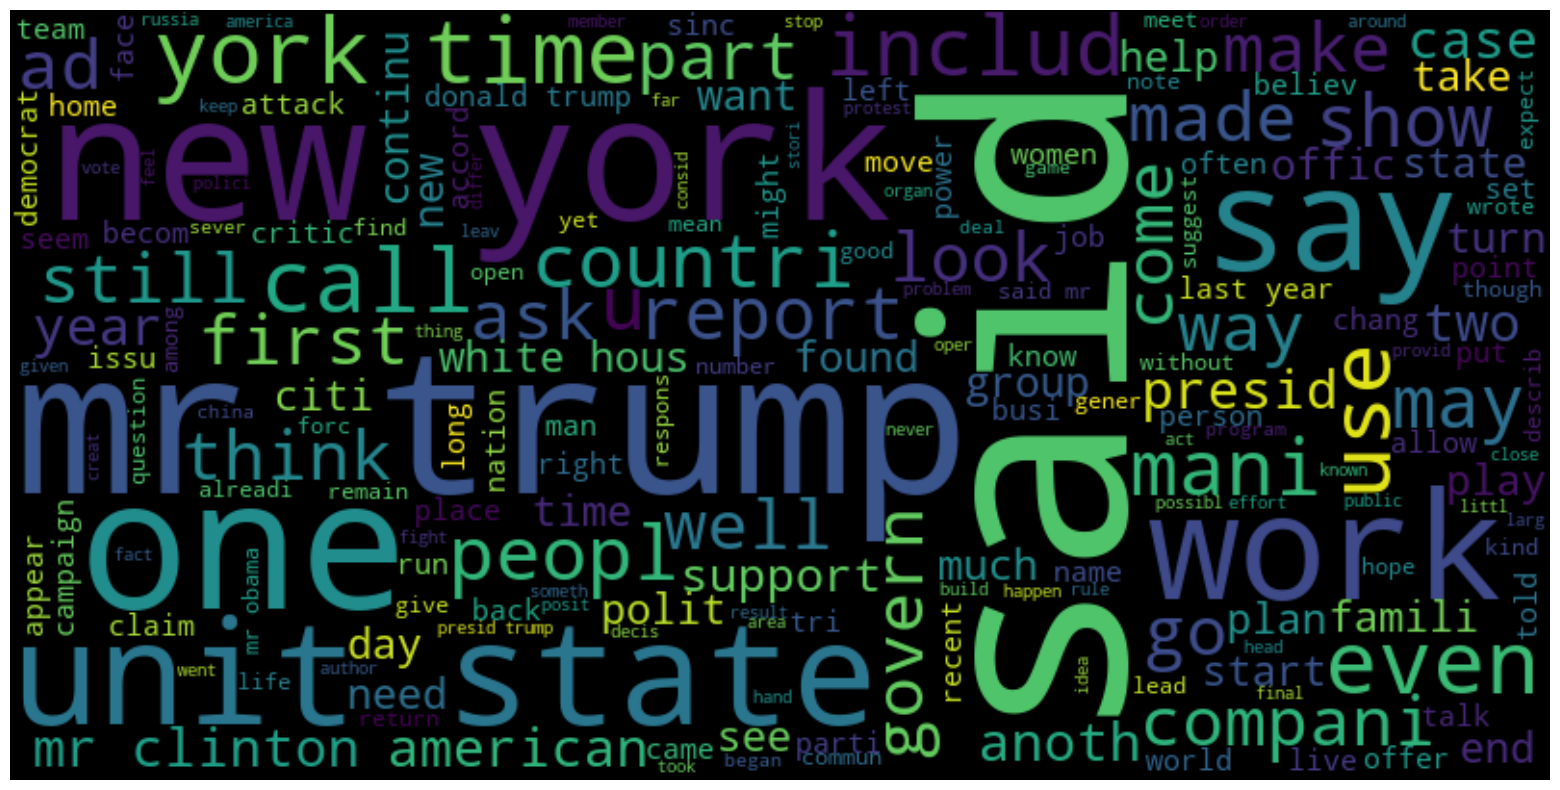

In [58]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400).generate(true_text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

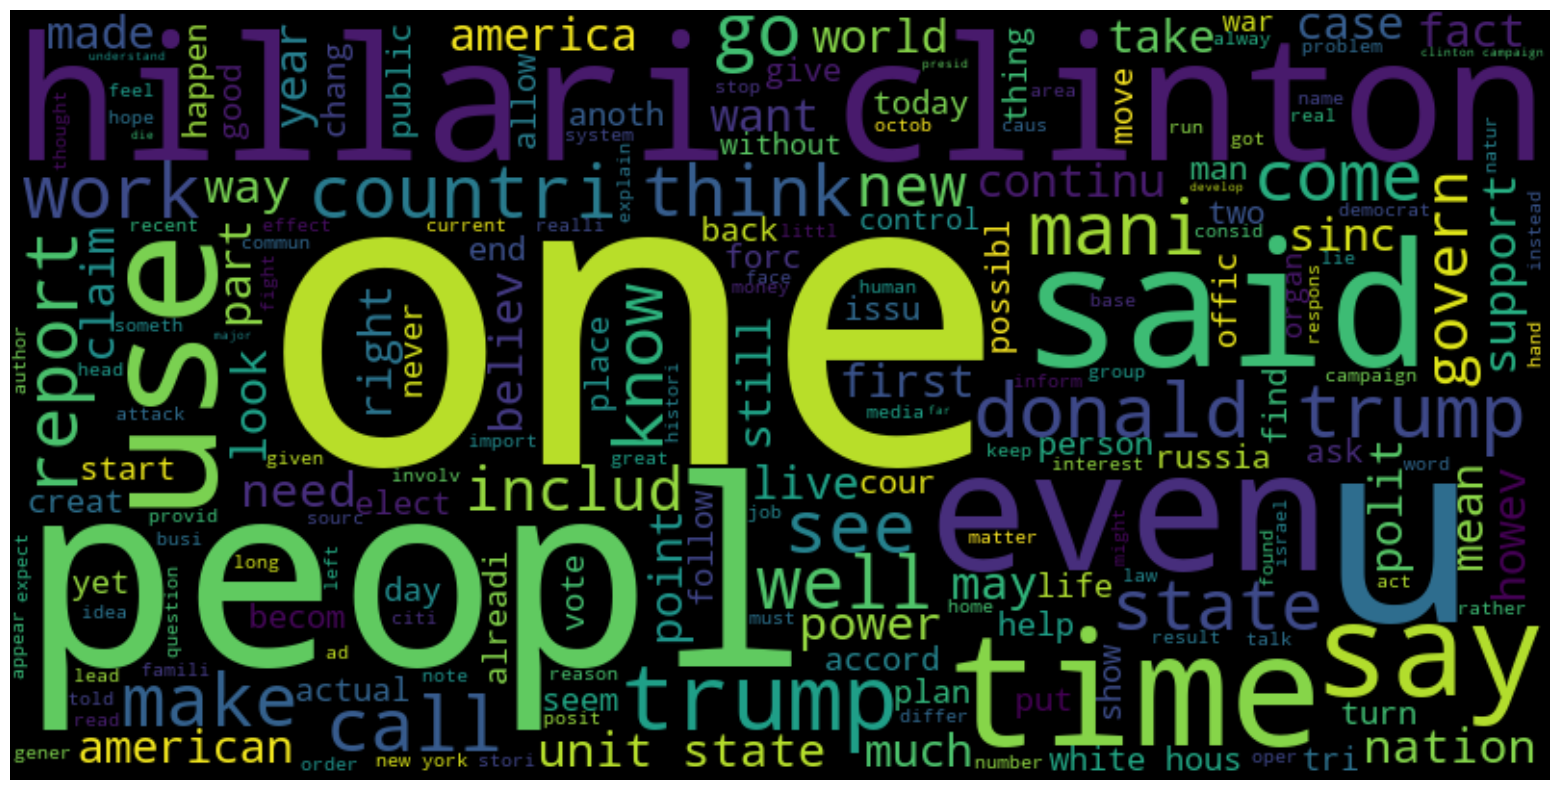

In [59]:
wordcloud = WordCloud(width=800, height=400).generate(false_text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### N-grams tru/false

In [25]:
from nltk import ngrams

true_bigrams = ngrams(true_text.split(),2)
true_counter = pd.Series(true_bigrams).value_counts().reset_index()
true_counter = true_counter.rename(columns={'index':'bigram', 0:'count'})
false_bigrams = ngrams(false_text.split(),2)
false_counter = pd.Series(false_bigrams).value_counts().reset_index()
false_counter = false_counter.rename(columns={'index':'bigram', 0:'count'})

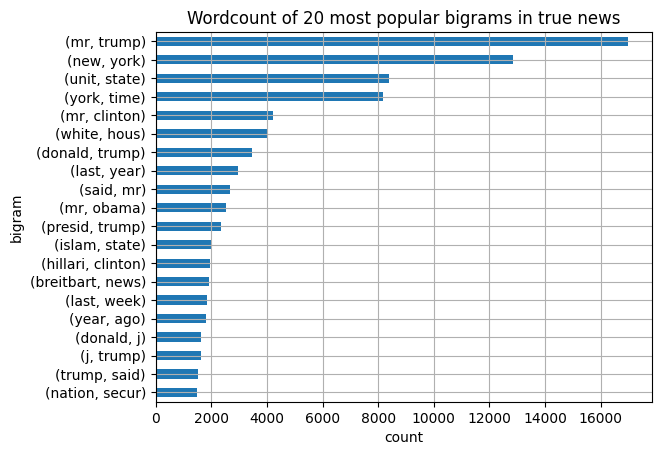

In [26]:
ax = true_counter.iloc[0:20].plot.barh(x='bigram',y='count', grid=True, legend =False,
                                      title="Wordcount of 20 most popular bigrams in true news")
ax.set_xlabel("count")
ax.text=False
ax.invert_yaxis()

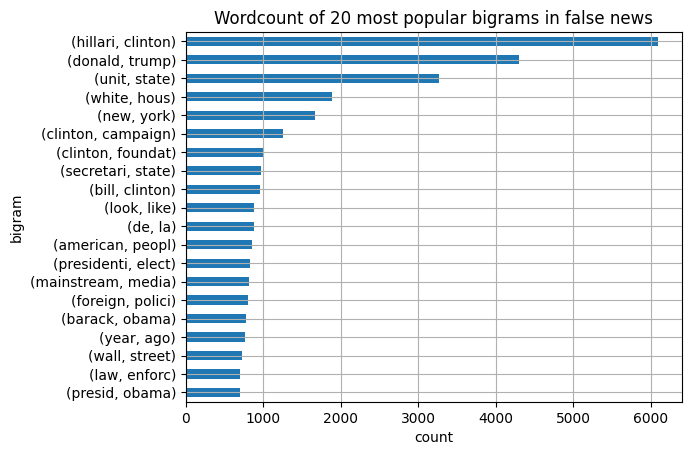

In [27]:
ax = false_counter.iloc[0:20].plot.barh(x='bigram',y='count', grid=True, legend =False,
                                      title="Wordcount of 20 most popular bigrams in false news")
ax.set_xlabel("count")
ax.text=False
ax.invert_yaxis()

### Split the data train test

In [28]:
from sklearn.model_selection import train_test_split 

clean_df = df.apply(lambda row: " ".join(row['text']),axis=1)
X_train, X_test, y_train, y_test = train_test_split(clean_df, df.label, test_size=0.3, random_state=42)

### TF-IDF

In [29]:
X_train

14539    special op studiou bent fight destruct brazil ...
14820    barack obama delay suspend elect hillari forc ...
17590    shock top 100 bombshel wikileak email reveal f...
10128    humili hillari swarm trump support florida ear...
19394    john bolton pari climat accord object reduct n...
                               ...                        
12439    uk bridg trump nigel farag push brexit posit n...
19674    trump inaugur parad lineup border patrol pipe ...
5932     comment scientist find plant could treat diabe...
13849    cnn zakaria obama could given trump saudi spee...
272      crumpl school bu leav chattanooga daze new yor...
Length: 12799, dtype: object

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)

In [31]:
tfidf_train

<12799x120546 sparse matrix of type '<class 'numpy.float64'>'
	with 3467980 stored elements in Compressed Sparse Row format>

### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(tfidf_train,y_train)

In [61]:
clf.cost_complexity_pruning_path(tfidf_train, y_train)

{'ccp_alphas': array([0.00000000e+00, 1.04174805e-04, 1.04174805e-04, 1.04174805e-04,
        1.04174805e-04, 1.04174805e-04, 1.04174805e-04, 1.17196656e-04,
        1.17196656e-04, 1.17196656e-04, 1.17196656e-04, 1.25009766e-04,
        1.30218507e-04, 1.30218507e-04, 1.30218507e-04, 1.30218507e-04,
        1.38899740e-04, 1.38899740e-04, 1.38899740e-04, 1.38899740e-04,
        1.38899740e-04, 1.38899740e-04, 1.40635987e-04, 1.40635987e-04,
        1.40635987e-04, 1.44242038e-04, 1.45100622e-04, 1.45100622e-04,
        1.48449098e-04, 1.48449098e-04, 1.48821150e-04, 1.48821150e-04,
        1.52038905e-04, 1.52450935e-04, 1.53395012e-04, 1.53781855e-04,
        1.53820611e-04, 1.54150557e-04, 1.54258846e-04, 1.54683802e-04,
        1.55031797e-04, 1.55206382e-04, 1.55435424e-04, 1.55686391e-04,
        1.55689819e-04, 1.55772102e-04, 2.05202034e-04, 2.08349611e-04,
        2.31245142e-04, 2.31570354e-04, 2.34393312e-04, 2.34393312e-04,
        2.34393312e-04, 2.43074546e-04, 2.67878071

In [50]:
print("Accuracy:",clf.score(tfidf_test,y_test)*100)

Accuracy: 95.2971199416697


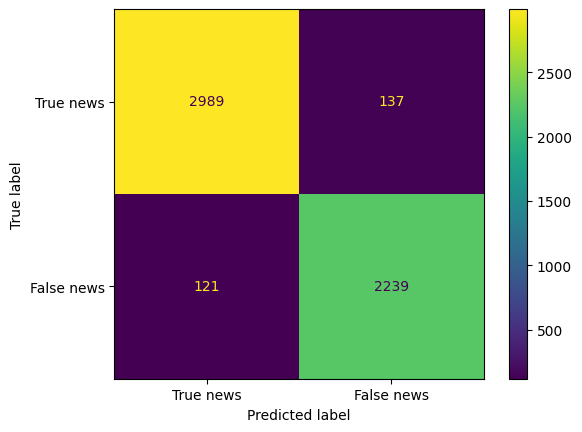

In [54]:
prediction = clf.predict(tfidf_test)
cm = confusion_matrix(y_test,prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['True news', 'False news'])
disp.plot()
plt.show()

In [64]:
print("Report:\n",classification_report(y_test,prediction))

Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      3126
           1       0.94      0.95      0.95      2360

    accuracy                           0.95      5486
   macro avg       0.95      0.95      0.95      5486
weighted avg       0.95      0.95      0.95      5486



In [65]:
params = {'max_depth': [5,10,20],
          'min_samples_split': [10,100],
          'min_samples_leaf': [5,10]}
  
gdt = GridSearchCV(DecisionTreeClassifier(), params, refit = True, verbose = 3)
  
# fitting the model for grid search
gdt.fit(tfidf_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10;, score=0.933 total time=   4.6s
[CV 2/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10;, score=0.930 total time=   4.5s
[CV 3/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10;, score=0.933 total time=   4.7s
[CV 4/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10;, score=0.932 total time=   4.5s
[CV 5/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10;, score=0.937 total time=   4.5s
[CV 1/5] END max_depth=5, min_samples_leaf=5, min_samples_split=100;, score=0.933 total time=   4.4s
[CV 2/5] END max_depth=5, min_samples_leaf=5, min_samples_split=100;, score=0.928 total time=   4.3s
[CV 3/5] END max_depth=5, min_samples_leaf=5, min_samples_split=100;, score=0.934 total time=   4.2s
[CV 4/5] END max_depth=5, min_samples_leaf=5, min_samples_split=100;, score=0.933 total time=   4.3s
[CV 5/5] END max_depth=5, min_sampl

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 20], 'min_samples_leaf': [5, 10],
                         'min_samples_split': [10, 100]},
             verbose=3)

In [67]:
print(gdt.best_params_)
print(gdt.best_estimator_)

{'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10}
DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=10)


In [68]:
grid_predictions = gdt.predict(tfidf_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3126
           1       0.94      0.94      0.94      2360

    accuracy                           0.95      5486
   macro avg       0.95      0.95      0.95      5486
weighted avg       0.95      0.95      0.95      5486



import os
os.environ["PATH"] += os.pathsep + 'C:/Zainstalowane/windows_10_msbuild_Release_graphviz-6.0.2-win32/Graphviz/bin'

import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=vectorizer.get_feature_names_out(),
                                class_names=['True','False'],
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

path = clf.cost_complexity_pruning_path(tfidf_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [50]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(tfidf_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.15201551095916233


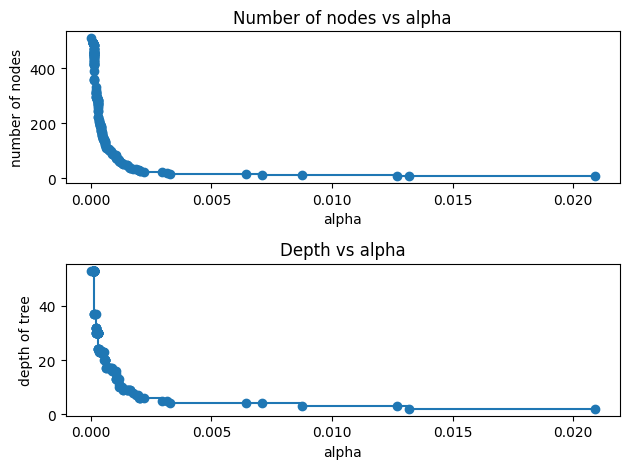

In [51]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

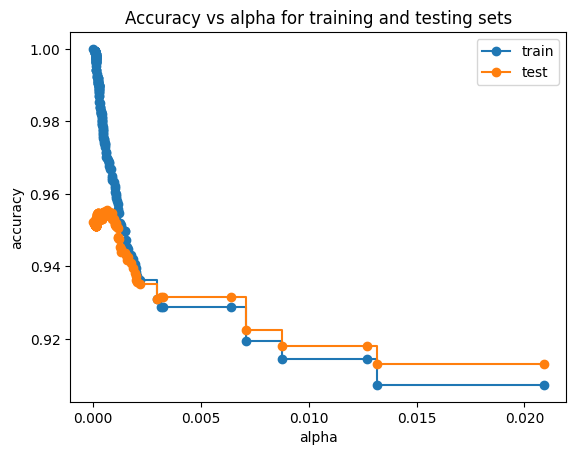

In [53]:
train_scores = [clf.score(tfidf_train, y_train) for clf in clfs]
test_scores = [clf.score(tfidf_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [62]:
graph.render("decision_tree_graphivz")
'decision_tree_graphivz.png'

'decision_tree_graphivz.png'

### Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf = rf.fit(tfidf_train,y_train)

In [66]:
print("Accuracy:",rf.score(tfidf_test,y_test)*100)

Accuracy: 92.25300765585126


In [67]:
prediction = rf.predict(tfidf_test)
cm = confusion_matrix(y_test,prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['True news', 'False news'])
disp.plot()
plt.show()

Confusion Matrix:  [[3070   56]
 [ 369 1991]]


In [68]:
print("Report:\n",classification_report(y_test,prediction))

Report :                precision    recall  f1-score   support

           0       0.89      0.98      0.94      3126
           1       0.97      0.84      0.90      2360

    accuracy                           0.92      5486
   macro avg       0.93      0.91      0.92      5486
weighted avg       0.93      0.92      0.92      5486



In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_depth': [5,10,20],
    'min_samples_split': [10,100],
    'min_samples_leaf': [5,10]}
}
  
grf = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grf.fit(tfidf_train, y_train)

### Support Vector Machine (SVM)

In [34]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm = svm.fit(tfidf_train,y_train)

In [35]:
print("Accuracy:",svm.score(tfidf_test,y_test)*100)

Accuracy: 97.4115931461903


In [36]:
prediction = svm.predict(tfidf_test)
cm = confusion_matrix(y_test,prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['True news', 'False news'])
disp.plot()
plt.show()

Confusion Matrix:
 [[3056   70]
 [  72 2288]]


In [37]:
print("Report:\n",classification_report(y_test,prediction))

Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3126
           1       0.97      0.97      0.97      2360

    accuracy                           0.97      5486
   macro avg       0.97      0.97      0.97      5486
weighted avg       0.97      0.97      0.97      5486



In [39]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(tfidf_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.943 total time= 3.7min
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.955 total time= 3.8min
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.964 total time= 3.9min
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.951 total time= 3.8min
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.950 total time= 4.0min
[CV 1/5] END ................C=1, kernel=linear;, score=0.968 total time= 2.2min
[CV 2/5] END ................C=1, kernel=linear;, score=0.977 total time= 1.9min
[CV 3/5] END ................C=1, kernel=linear;, score=0.975 total time= 2.2min
[CV 4/5] END ................C=1, kernel=linear;, score=0.969 total time= 1.8min
[CV 5/5] END ................C=1, kernel=linear;, score=0.968 total time= 1.7min
[CV 1/5] END ...............C=10, kernel=linear;, score=0.967 total time= 1.8min
[CV 2/5] END ...............C=10, kernel=linear;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
             verbose=3)

In [40]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear')


In [41]:
grid_predictions = grid.predict(tfidf_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3126
           1       0.97      0.97      0.97      2360

    accuracy                           0.97      5486
   macro avg       0.97      0.97      0.97      5486
weighted avg       0.97      0.97      0.97      5486



### Naive Bayes

In [75]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB(random_state=42)
nb = nb.fit(tfidf_train,y_train)

In [76]:
print("Accuracy:",nb.score(tfidf_test,y_test)*100)

Accuracy: 75.95698140721836


In [77]:
prediction = nb.predict(tfidf_test)
cm = confusion_matrix(y_test,prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['True news', 'False news'])
disp.plot()
plt.show()

Confusion Matrix:  [[3125    1]
 [1318 1042]]


In [78]:
print("Report:\n",classification_report(y_test,prediction))

Report :                precision    recall  f1-score   support

           0       0.70      1.00      0.83      3126
           1       1.00      0.44      0.61      2360

    accuracy                           0.76      5486
   macro avg       0.85      0.72      0.72      5486
weighted avg       0.83      0.76      0.73      5486



In [ ]:
param_grid = { 
    'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
}
  
gnb = GridSearchCV(MultinomialNB(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
gnb.fit(tfidf_train, y_train)

###  KNN (k- Nearest Neighbors)

In [79]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(random_state=42)
knn = knn.fit(tfidf_train,y_train)

In [80]:
print("Accuracy:",knn.score(tfidf_test,y_test)*100)

Accuracy: 87.58658403208166


In [81]:
prediction = knn.predict(tfidf_test)
cm = confusion_matrix(y_test,prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['True news', 'False news'])
disp.plot()
plt.show()

Confusion Matrix:  [[2958  168]
 [ 513 1847]]


In [82]:
print("Report:\n",classification_report(y_test,prediction))

Report :                precision    recall  f1-score   support

           0       0.85      0.95      0.90      3126
           1       0.92      0.78      0.84      2360

    accuracy                           0.88      5486
   macro avg       0.88      0.86      0.87      5486
weighted avg       0.88      0.88      0.87      5486



In [ ]:
param_grid = { 
    'n_neighbors': [2, 5, 10, 20]
}
  
gknn = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
gknn.fit(tfidf_train, y_train)

### Which classifier has better accuracy

#### https://iopscience.iop.org/article/10.1088/1757-899X/1099/1/012040/pdf